In [4]:
!pip3 install numpy
!pip3 install pandas #"pandas" is the primary package used for the analysis of data frames. 
!pip3 install statsmodels
!pip3 install matplotlib


[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [5]:
import numpy as np #Imports the "numpy" library for our use in this program
import pandas as pd #Imports the "pandas" library for our use in this program
import statsmodels as statsmodels
import matplotlib as plt #Allows for the plotting of time series. The "matplotlib" package is enables us to create more diverse
#and sophisticated visualizations than the standard Python functions. 

In [6]:
exchanges_select = pd.read_csv("/Users/rishisingh/Downloads/exchanges_select.csv") #Uses the 'pandas' package to import
#our cleaned data frame from our R program: "exchanges_select". 

In [7]:
exchanges_select #Checks to see that our data frame was properly imported. Notice how we a duplicate column counts. We need to fix that. 

,Unnamed: 0,Date,CNY.X,JPY.X,SGD.X,INR.X,AED.X
0,1,1/1/2004,8.27,107.30,1.70,45.53,3.67
1,2,1/2/2004,8.27,106.91,1.70,45.60,3.67
2,3,1/5/2004,8.27,106.24,1.70,45.47,3.67
3,4,1/6/2004,8.27,106.23,1.70,45.55,3.67
4,5,1/7/2004,8.27,106.18,1.70,45.39,3.67
...,...,...,...,...,...,...,...
4951,4952,12/26/2022,6.99,132.79,1.35,82.60,3.67
4952,4953,12/27/2022,6.96,132.76,1.35,82.90,3.67
4953,4954,12/28/2022,6.96,133.49,1.35,82.78,3.67
4954,4955,12/29/2022,6.98,134.03,1.35,82.85,3.67


In [8]:
exchanges_select = exchanges_select[["Date", "CNY.X", "JPY.X", "SGD.X", "INR.X", "AED.X"]] #Selects only the columns that we need. 
#Running this line of code naturally removes our duplicate row counts. 

In [9]:
exchanges_select #Checks to see that our duplicate row counts were removed; they were.  

,Date,CNY.X,JPY.X,SGD.X,INR.X,AED.X
0,1/1/2004,8.27,107.30,1.70,45.53,3.67
1,1/2/2004,8.27,106.91,1.70,45.60,3.67
2,1/5/2004,8.27,106.24,1.70,45.47,3.67
3,1/6/2004,8.27,106.23,1.70,45.55,3.67
4,1/7/2004,8.27,106.18,1.70,45.39,3.67
...,...,...,...,...,...,...
4951,12/26/2022,6.99,132.79,1.35,82.60,3.67
4952,12/27/2022,6.96,132.76,1.35,82.90,3.67
4953,12/28/2022,6.96,133.49,1.35,82.78,3.67
4954,12/29/2022,6.98,134.03,1.35,82.85,3.67


<Axes: xlabel='Date'>

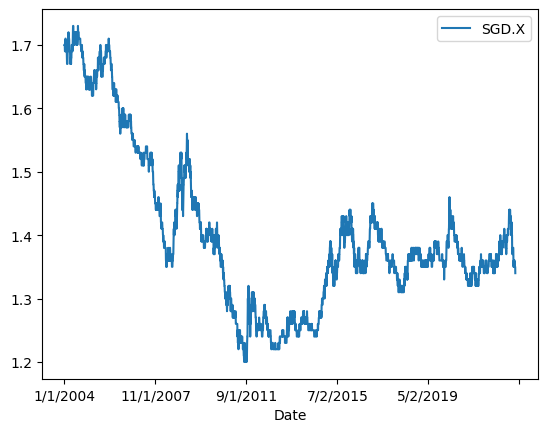

In [14]:
exchanges_select.plot("Date", "SGD.X") #These exchange rate columns are ALSO instrinsically time series models. This
#time series is of the SINGAPORE DOLLAR. 

<Axes: xlabel='Date'>

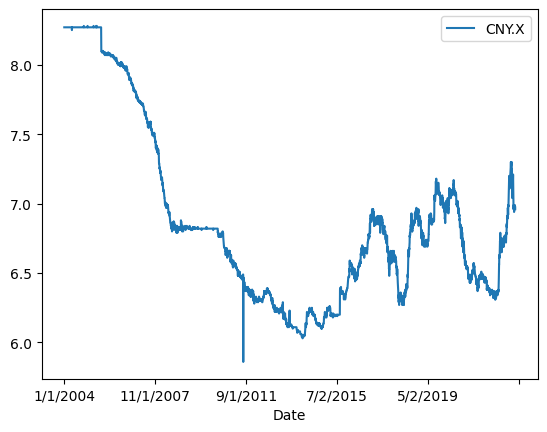

In [17]:
exchanges_select.plot("Date", "CNY.X") #Time Series of the Chinese Yuan. 

In [18]:
from statsmodels.tsa.stattools import grangercausalitytests #Here from the "statsmodels" module in Python we are importing
#the function that allows us to perform a Granger Causality Test. 

grangercausalitytests(exchanges_select[["SGD.X", "CNY.X"]], maxlag = 4) #Note: there is a statistical method to calculate 
#the optimal number of lags to use for this test. I encourage you to read more about it when you can. 


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4826  , p=0.1152  , df_denom=4952, df_num=1
ssr based chi2 test:   chi2=2.4841  , p=0.1150  , df=1
likelihood ratio test: chi2=2.4835  , p=0.1150  , df=1
parameter F test:         F=2.4826  , p=0.1152  , df_denom=4952, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4428  , p=0.2364  , df_denom=4949, df_num=2
ssr based chi2 test:   chi2=2.8886  , p=0.2359  , df=2
likelihood ratio test: chi2=2.8877  , p=0.2360  , df=2
parameter F test:         F=1.4428  , p=0.2364  , df_denom=4949, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3853  , p=0.2452  , df_denom=4946, df_num=3
ssr based chi2 test:   chi2=4.1618  , p=0.2445  , df=3
likelihood ratio test: chi2=4.1601  , p=0.2447  , df=3
parameter F test:         F=1.3853  , p=0.2452  , df_denom=4946, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.7050  , p=0.

{1: ({'ssr_ftest': (2.482571886228403, 0.1151777579598725, 4952.0, 1),
   'ssr_chi2test': (2.4840758675811263, 0.1150038805851177, 1),
   'lrtest': (2.483453408247442, 0.1150493922994963, 1),
   'params_ftest': (2.4825718861749264, 0.11517775796382025, 4952.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (1.4428219352377245, 0.23635946851194584, 4949.0, 2),
   'ssr_chi2test': (2.8885592512296165, 0.23591596317446126, 2),
   'lrtest': (2.887717453391815, 0.23601528084819734, 2),
   'params_ftest': (1.4428219352182305, 0.236359468516651, 4949.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.3853170443290903, 0.24524413159968392, 4946.0, 3),
   'ssr_chi2test': (4.161832988614224, 0.24451101491761656, 3),
   'lrtest': (4.160085445961158, 0.24468859480351668, 3),
   'params_ftest': (1.385317044319758, 0.2452441316025258, 4946.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.